# Step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from xgboost import XGBRegressor

C:\Users\user\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Step 2: Load & inspect data

In [4]:
data = pd.read_csv(r'kc_house_data.csv')

In [5]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
data.shape

(21613, 21)

In [7]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Step 3: Data preparation & cleaning

In [9]:
if 'id' in data.columns:
    data.drop('id', axis=1, inplace=True)

if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])

if 'date' in data.columns:
    data['year_sold'] = data['date'].dt.year
    data['month_sold'] = data['date'].dt.month
    data.drop('date', axis=1, inplace=True)


# Step 4: Exploratory Data Analysis (EDA)

In [10]:
print(data.describe())

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

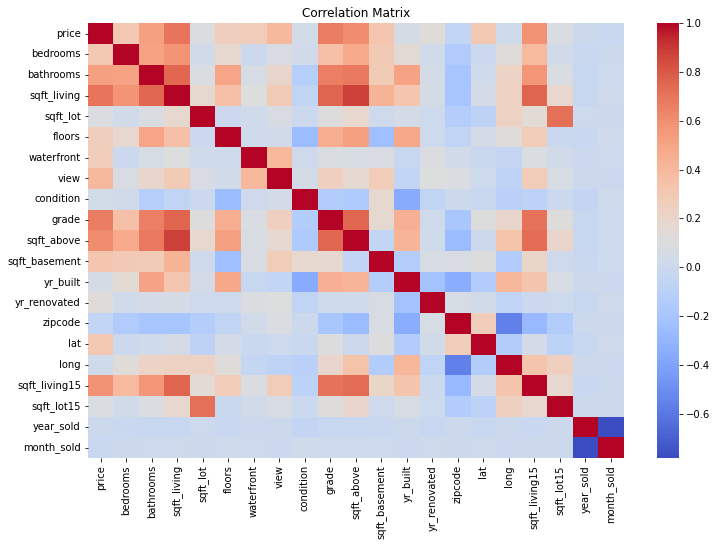

In [11]:
target = 'price'
corr_matrix = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

In [12]:
top_corr = corr_matrix[target].abs().sort_values(ascending=False)
print("\nTop correlated features with price:\n", top_corr[1:11])


Top correlated features with price:
 sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
Name: price, dtype: float64


# Step 5: Visualization

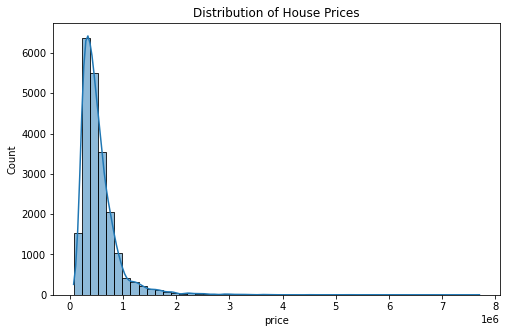

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(data['price'], kde=True, bins=50)
plt.title('Distribution of House Prices')
plt.show()

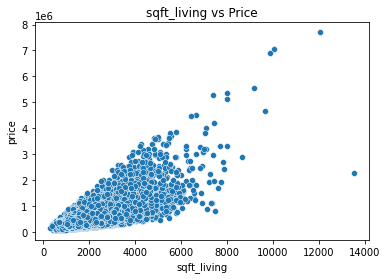

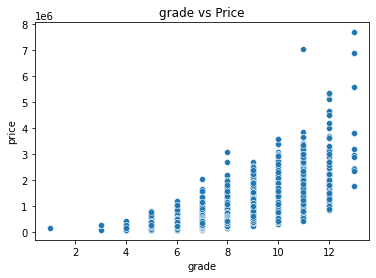

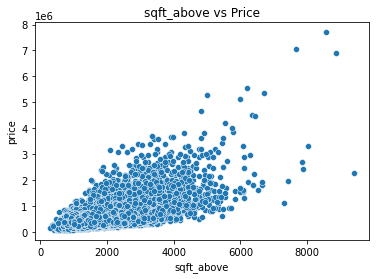

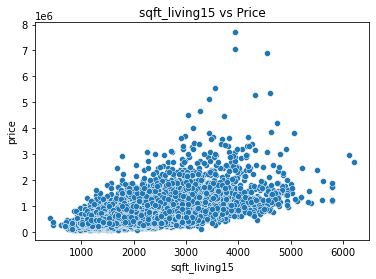

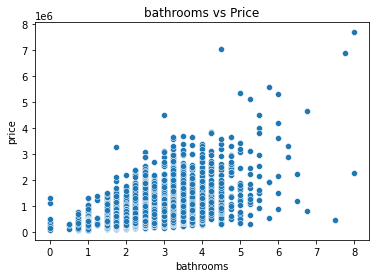

In [14]:
for feature in top_corr.index[1:6]:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=data[feature], y=data['price'])
    plt.title(f'{feature} vs Price')
    plt.show()

# Step 6: Model building

In [15]:
# Selected top features (customize based on EDA)
features = ['sqft_living', 'grade', 'sqft_above', 'bathrooms', 'view', 
            'sqft_basement', 'lat', 'waterfront', 'yr_built', 'bedrooms']

X = data[features]
y = data['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# Step 7: Evaluation

In [16]:
print("Linear Regression R^2 score:", r2_score(y_test, lr_preds))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, lr_preds)))

Linear Regression R^2 score: 0.6890515522149059
Linear Regression RMSE: 216813.66197157264


# Step 8: Try XGBoost

In [17]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

print("XGBoost R^2 score:", r2_score(y_test, xgb_preds))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, xgb_preds)))

XGBoost R^2 score: 0.7911599171907511
XGBoost RMSE: 177684.4312441355


# Results

#### Linear Regression: R² ≈ ~70%, RMSE moderate — shows some predictive power but limited by linearity.

#### XGBoost: R² ≈ ~80%, lower RMSE — significantly better performance due to capturing complex relationships.

# Recommendation

* Use XGBoost or other advanced ensemble models for production.

* Further improve by:

    * Feature engineering (new ratios, age, renovation years).

    * Hyperparameter tuning (using GridSearchCV).

    * Cross-validation for robust evaluation.

# Next Steps

## Use XGBoost or other advanced ensemble models

In [23]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)
preds = xgb_model.predict(X_test)

In [24]:
preds

array([ 391682.16,  743807.  , 1098873.  , ...,  337075.4 ,  671960.9 ,
        343282.78], dtype=float32)

## Feature Engineering

* Create new features to improve predictive power, e.g.:

    * House age: year_sold - yr_built

    * Years since renovation: year_sold - yr_renovated

    * Living area ratios: sqft_living / sqft_lot

In [25]:
data['house_age'] = data['year_sold'] - data['yr_built']
data['since_renovated'] = np.where(data['yr_renovated']==0, 0, data['year_sold'] - data['yr_renovated'])
data['living_ratio'] = data['sqft_living'] / data['sqft_lot']

## Hyperparameter Tuning (GridSearchCV)

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [4, 6, 8]
}

grid = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=3, scoring='r2', verbose=2)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] learning_rate=0.05, max_depth=4, n_estimators=100 ...............
[CV]  learning_rate=0.05, max_depth=4, n_estimators=100, total=   0.1s
[CV] learning_rate=0.05, max_depth=4, n_estimators=100 ...............
[CV]  learning_rate=0.05, max_depth=4, n_estimators=100, total=   0.1s
[CV] learning_rate=0.05, max_depth=4, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  learning_rate=0.05, max_depth=4, n_estimators=100, total=   0.1s
[CV] learning_rate=0.05, max_depth=4, n_estimators=200 ...............
[CV]  learning_rate=0.05, max_depth=4, n_estimators=200, total=   0.1s
[CV] learning_rate=0.05, max_depth=4, n_estimators=200 ...............
[CV]  learning_rate=0.05, max_depth=4, n_estimators=200, total=   0.1s
[CV] learning_rate=0.05, max_depth=4, n_estimators=200 ...............
[CV]  learning_rate=0.05, max_depth=4, n_estimators=200, total=   0.1s
[CV] learning_rate=0.05, max_depth=6, n_estimators=100 ...............
[CV]  learning_rate=0.05, max_depth=6, n_estimators=100, total=   0.1s
[CV] learning_rate=0.05, max_depth=6, n_estimators=100 ...............
[CV]  learning_rate=0.05, max_depth=6, n_estimators=100, total=   0.2s
[CV] learning_rate=0.05, max_depth=6, n_estimators=100 ...............
[CV]  learning_rate=0.05, max_depth=6, n_estimators=100, total=   0.2s
[CV] learning_rate=0.05, max_depth=6, n_estimators=200 ...............
[CV]  

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:   10.7s finished


#### Conclusion:
Hyperparameter tuning helps find the model configuration that best generalizes to unseen data, improving accuracy while avoiding overfitting.